In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
from sklearn.ensemble import RandomForestRegressor
import matplotlib

C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
train = pd.read_csv('train.csv', parse_dates = ['date'])
test = pd.read_csv('test.csv', parse_dates = ['date'])
submissions = pd.read_csv('SampleSubmission.csv')
vd = pd.read_csv('VariableDefinitionsHotspot.csv')

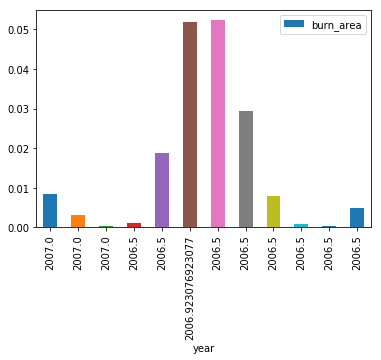

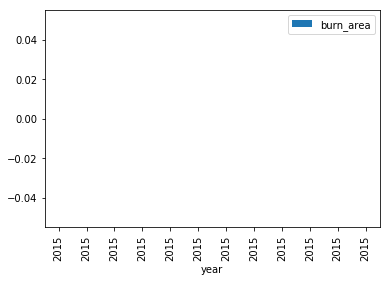

In [3]:
# Date variables
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
train.groupby('month').mean().reset_index().plot(y='burn_area', x='year', kind='bar')

# Date variables
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
test.groupby('month').mean().reset_index().plot(y='burn_area', x='year', kind='bar')

In [4]:
print(train.columns)

train = train.drop(['population_density', 'ID', 'date', 'climate_swe', 'landcover_0',
                    'landcover_1', 'landcover_2', 'landcover_3', 'landcover_5', 'landcover_6',
                    'landcover_7', 'landcover_8'], axis=1)
test = test.drop(['population_density', 'ID', 'burn_area', 'date', 'climate_swe', 'landcover_0','landcover_1', 
                  'landcover_2', 'landcover_3', 'landcover_5', 'landcover_6','landcover_7', 'landcover_8'], axis=1)

Index(['ID', 'area', 'date', 'lat', 'lon', 'burn_area', 'climate_aet',
       'climate_def', 'climate_pdsi', 'climate_pet', 'climate_pr',
       'climate_ro', 'climate_soil', 'climate_srad', 'climate_swe',
       'climate_tmmn', 'climate_tmmx', 'climate_vap', 'climate_vpd',
       'climate_vs', 'elevation', 'landcover_0', 'landcover_1', 'landcover_2',
       'landcover_3', 'landcover_4', 'landcover_5', 'landcover_6',
       'landcover_7', 'landcover_8', 'population_density', 'precipitation',
       'month', 'year'],
      dtype='object')


In [5]:
print(train.shape)
print(test.shape)

(626644, 22)
(137556, 21)


In [6]:
print(train.columns)
print(test.columns)

Index(['area', 'lat', 'lon', 'burn_area', 'climate_aet', 'climate_def',
       'climate_pdsi', 'climate_pet', 'climate_pr', 'climate_ro',
       'climate_soil', 'climate_srad', 'climate_tmmn', 'climate_tmmx',
       'climate_vap', 'climate_vpd', 'climate_vs', 'elevation', 'landcover_4',
       'precipitation', 'month', 'year'],
      dtype='object')
Index(['area', 'lat', 'lon', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_4',
       'precipitation', 'month', 'year'],
      dtype='object')


In [7]:
Labels = np.array(train['burn_area'])
print(Labels)

[0.00368827 0.         0.         ... 0.         0.         0.        ]


In [8]:
train = train.drop('burn_area', axis=1)

In [12]:
#train = train.drop('burn_area', axis=1)

Features = np.array(train)
test_enc = np.array(test)

In [13]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(Features[:, :])
Features[:, :] = scaler.transform(Features[:, :])
#print(Features[:, :])

In [14]:
scaler1 = preprocessing.StandardScaler().fit(test_enc[:, :])
test_enc[:, :] = scaler1.transform(test_enc[:, :])
#print(test_enc[:, :])

In [15]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [16]:
indx1 = range(x_train.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.2)
x_train1 = x_train[indx1[0],:]
y_train1 = np.ravel(y_train[indx1[0]])
x_train_val = x_train[indx1[1],:]
y_train_val = np.ravel(y_train[indx1[1]])

In [17]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7, max_features=7)

In [18]:
rf.fit(x_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [19]:
rf_preds = rf.predict(x_train_val)

In [25]:
from sklearn.metrics import mean_squared_error

mean_squared_error(rf_preds, y_train_val)**0.5

0.04123036573755297

In [22]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [23]:
preds = rf.predict(test_enc)

In [24]:
submissions.Prediction = preds
submissions.to_csv('HotspotSubmission4.csv', index=False)